In [1]:
#Imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import numpy as np
from pandas.api.types import is_string_dtype
import os
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler,Normalizer,FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import warnings
from sklearn.svm import SVR
import statsmodels.api as sm
import re

In [ ]:
import tensorflow as tf
from prophet import Prophet
from tf.keras.models import Sequential
from tf.keras.layers import LSTM, Dense, Dropout, Embedding, Masking


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [2]:
#view all rows and columns
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', 199)  # or 199

In [3]:
#Importing Data From NYC Open Data
def get_data(link):
    cy2020_json = requests.get(link)
    cy2020_recs = json.loads(cy2020_json.text)
    df = pd.DataFrame(cy2020_recs)
    return df
    

In [4]:
# df2020=get_data('https://data.cityofnewyork.us/resource/usc3-8zwd.json?$limit=5000000')
df2019=get_data('https://data.cityofnewyork.us/resource/wcm8-aq5w.json?$limit=5000000')
df2018=get_data('https://data.cityofnewyork.us/resource/4tys-3tzj.json?$limit=5000000')
df2017=get_data('https://data.cityofnewyork.us/resource/4t62-jm4m.json?$limit=5000000')
df2016=get_data('https://data.cityofnewyork.us/resource/utpj-74fz.json?$limit=5000000')
df2015=get_data('https://data.cityofnewyork.us/resource/77q4-nkfh.json?$limit=5000000')
df2014=get_data('https://data.cityofnewyork.us/resource/nbun-wekj.json?$limit=5000000')
df2013=get_data('https://data.cityofnewyork.us/resource/yr5p-wjer.json?$limit=5000000')

In [5]:
# Append all the df
#data_tot = pd.concat([df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013],ignore_index = True,sort = False)

NameError: name 'df2020' is not defined

In [ ]:
#data_tot.to_csv('Energy_data.csv')  

data_tot

data_tot.shape

data_tot.info()

In [5]:
#copy data
dfc13=df2013.copy()
dfc14=df2014.copy()
dfc15=df2015.copy()
dfc16=df2016.copy()
dfc17=df2017.copy()
dfc18=df2018.copy()
dfc19=df2019.copy()


dfc=df2020.copy()

In [6]:
#replace Not Available/Insufficient access with NaN
dfc13.replace('Not Available',np.nan,inplace=True)
dfc13.replace("Insufficient access",np.nan,inplace=True)
dfc14.replace('Not Available',np.nan,inplace=True)
dfc14.replace("Insufficient access",np.nan,inplace=True)
dfc15.replace('Not Available',np.nan,inplace=True)
dfc15.replace("Insufficient access",np.nan,inplace=True)
dfc16.replace('Not Available',np.nan,inplace=True)
dfc16.replace("Insufficient access",np.nan,inplace=True)
dfc17.replace('Not Available',np.nan,inplace=True)
dfc17.replace("Insufficient access",np.nan,inplace=True)
dfc18.replace('Not Available',np.nan,inplace=True)
dfc18.replace("Insufficient access",np.nan,inplace=True)
dfc19.replace('Not Available',np.nan,inplace=True)
dfc19.replace("Insufficient access",np.nan,inplace=True)

In [7]:
#create a list of column names
my_list13 = dfc13.columns.values.tolist()
my_list14 = dfc14.columns.values.tolist()
my_list15 = dfc15.columns.values.tolist()
my_list16 = dfc16.columns.values.tolist()
my_list17 = dfc17.columns.values.tolist()
my_list18 = dfc18.columns.values.tolist()
my_list19 = dfc19.columns.values.tolist()

In [8]:
#Loop through columns and transform from objects to int or float
for n in my_list13:
    dfc13[n] = pd.to_numeric(dfc13[n], errors='ignore')
for n in my_list14:
    dfc14[n] = pd.to_numeric(dfc14[n], errors='ignore')
for n in my_list15:
    dfc15[n] = pd.to_numeric(dfc15[n], errors='ignore')
for n in my_list16:
    dfc16[n] = pd.to_numeric(dfc16[n], errors='ignore')
for n in my_list17:
    dfc17[n] = pd.to_numeric(dfc17[n], errors='ignore')
for n in my_list18:
    dfc18[n] = pd.to_numeric(dfc18[n], errors='ignore')
for n in my_list19:
    dfc19[n] = pd.to_numeric(dfc19[n], errors='ignore')


dfc.to_csv('Energy_data_1.csv')  

dfc.info()

In [84]:
#From kaggle
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(dfc13)[110:150]

In [10]:
# Delete columns containing either 50% or more than 50% NaN Values
perc = 75.0
min_count13 =  int(((100-perc)/100)*dfc13.shape[0] + 1)
dfc_reduced13 = dfc13.dropna( axis=1, thresh=min_count13)
min_count14 =  int(((100-perc)/100)*dfc14.shape[0] + 1)
dfc_reduced14 = dfc14.dropna( axis=1, thresh=min_count14)
min_count15 =  int(((100-perc)/100)*dfc15.shape[0] + 1)
dfc_reduced15 = dfc15.dropna( axis=1, thresh=min_count15)
min_count16 =  int(((100-perc)/100)*dfc16.shape[0] + 1)
dfc_reduced16 = dfc16.dropna( axis=1, thresh=min_count16)
min_count17 =  int(((100-perc)/100)*dfc17.shape[0] + 1)
dfc_reduced17 = dfc17.dropna( axis=1, thresh=min_count17)
min_count18 =  int(((100-perc)/100)*dfc18.shape[0] + 1)
dfc_reduced18 = dfc18.dropna( axis=1, thresh=min_count18)
min_count19 =  int(((100-perc)/100)*dfc19.shape[0] + 1)
dfc_reduced19 = dfc19.dropna( axis=1, thresh=min_count19)


dfc_reduced.info()

#dfc_reduced.to_csv('Energy_data_reduced_2020.csv')
dfc_reduced.to_csv('Energy_data_reduced_2019.csv')

In [11]:
n13=list(dfc_reduced13.columns)
n14=list(dfc_reduced14.columns)
n15=list(dfc_reduced15.columns)
n16=list(dfc_reduced16.columns)
n17=list(dfc_reduced17.columns)
n18=list(dfc_reduced18.columns)
n19=list(dfc_reduced19.columns)

dfc_reduced14.rename(columns = {'primary_property_type_self': 'largest_property_use_type'})

In [12]:
ble=['property_id',
'property_name',
 'year_ending',
 'nyc_building_identification',
 'nyc_borough_block_and_lot',
 'address_1',
 'city',
 'postcode',
 'primary_property_type_self',
 'year_built',
 'number_of_buildings',
 'occupancy',
 'metered_areas_energy',
 'energy_star_score',
 'site_eui_kbtu_ft',
 'weather_normalized_site_eui',
 'site_energy_use_kbtu',
 'weather_normalized_site_energy',
 'weather_normalized_site',
 'source_eui_kbtu_ft',
 'weather_normalized_source',
 'source_energy_use_kbtu',
 'natural_gas_use_kbtu',
 'electricity_use_grid_purchase',
 'avoided_emissions_offsite',
 'estimated_data_flag',
 'estimated_data_flag_natural',
 'total_ghg_emissions_metric',
 'direct_ghg_emissions_metric',
 'indirect_ghg_emissions_metric',
 'egrid_output_emissions_rate',
 'net_emissions_metric_tons',
 'green_power_offsite_kwh',
 'borough',
 'latitude',
 'longitude',
 'community_board',
 'council_district',
 'census_tract',
 'nta']

In [ ]:
result =  all(elem in n19  for elem in ble)
if result:
    print("Yes, list contains all elements in ble")    
else :
    print("No, list does not contains all elements in ble")

In [ ]:
ply=[]
for i in ble:
    if i not in n14:
        ply.append(i)
ply

In [13]:
dfc_common14=dfc_reduced14[ble]
dfc_common15=dfc_reduced15[ble]
dfc_common16=dfc_reduced16[ble]
dfc_common17=dfc_reduced17[ble]
dfc_common18=dfc_reduced18[ble]
dfc_common19=dfc_reduced19[ble]

In [14]:
sim_prop=[]
for i in list(dfc_common19['property_id']):
    if i in list(dfc_common18['property_id']) and list(dfc_common17['property_id']) and list(dfc_common16['property_id']) and list(dfc_common15['property_id']) and list(dfc_common14['property_id']):
        sim_prop.append(i)  

In [15]:
dfc_com_prop14=dfc_common14[dfc_common14['property_id'].isin(sim_prop)]
dfc_com_prop15=dfc_common15[dfc_common15['property_id'].isin(sim_prop)]
dfc_com_prop16=dfc_common16[dfc_common16['property_id'].isin(sim_prop)]
dfc_com_prop17=dfc_common17[dfc_common17['property_id'].isin(sim_prop)]
dfc_com_prop18=dfc_common18[dfc_common18['property_id'].isin(sim_prop)]
dfc_com_prop19=dfc_common19[dfc_common19['property_id'].isin(sim_prop)]

In [ ]:
dfc_com_prop14['Year']='2014'
dfc_com_prop15['Year']='2015'
dfc_com_prop16['Year']='2016'
dfc_com_prop17['Year']='2017'
dfc_com_prop18['Year']='2018'
dfc_com_prop19['Year']='2019'

In [38]:
dfc_com_prop14.head()

property_id        property_name              year_ending  \
0         7365                 1155  2014-12-31T00:00:00.000   
1         8139                  200  2014-12-31T00:00:00.000   
2         8604                  114  2014-12-31T00:00:00.000   
3         8841                  733  2014-12-31T00:00:00.000   
4        11809  Conde Nast Building  2014-12-31T00:00:00.000   

  nyc_building_identification nyc_borough_block_and_lot  \
0                     1022631                1009970029   
1                     1037545                1013150001   
2                     1022667                1009990019   
3                     1037596                1013190047   
4                     1085682                1009950005   

                         address_1       city postcode  \
0  1155  Avenue  of  the  Americas  Manhattan    10036   
1             200  East  42nd  St.  Manhattan    10017   
2              114  West  47th  st  Manhattan    10036   
3               733  Third  Avenue  Manhattan    10017   
4                   4 Times Square  Manhattan    10036   

  primary_property_type_self  year_built  number_of_buildings  occupancy  \
0                     Office        1982                  1.0        100   
1                     Office        1956                  1.0        100   
2           Financial Office        1989                  1.0        100   
3                     Office        1961                  1.0        100   
4                     Office        1999                  1.0        100   

  metered_areas_energy  energy_star_score  site_eui_kbtu_ft  \
0       Whole Building               90.0              54.0   
1       Whole Building               86.0              85.3   
2       Whole Building               84.0              67.1   
3       Whole Building               75.0             100.6   
4       Whole Building               61.0             114.7   

   weather_normalized_site_eui  site_energy_use_kbtu  \
0                         54.2            37062507.6   
1                         83.4            32784679.8   
2                         63.2            38430692.9   
3                         96.6            36493016.2   
4                        113.6           183748751.8   

   weather_normalized_site_energy  weather_normalized_site  \
0                      37213816.0                     15.4   
1                      32045120.2                     12.7   
2                      36179398.2                     12.6   
3                      35009695.9                     15.0   
4                     181992594.0                     23.2   

   source_eui_kbtu_ft  weather_normalized_source  source_energy_use_kbtu  \
0               166.1                      166.8             114092935.5   
1               186.8                      184.1              71828630.8   
2               164.6                      159.4              94200249.9   
3               220.7                      215.0              80020129.4   
4               287.0                      285.8             459772065.2   

   natural_gas_use_kbtu  electricity_use_grid_purchase  \
0                   NaN                     35883681.2   
1                   NaN                     16720702.6   
2                   NaN                     24763843.4   
3                   NaN                     18646513.9   
4            48148830.4                    127046327.5   

   avoided_emissions_offsite estimated_data_flag estimated_data_flag_natural  \
0                        0.0                  No                         NaN   
1                        0.0                  No                         NaN   
2                        0.0                  No                         NaN   
3                        0.0                  No                         NaN   
4                       49.0                  No                          No   

   total_ghg_emissions_metric  direct_ghg_emissions_metric  \
0                  

In [39]:
from datetime import datetime
dfc_com_prop14['Year'] = pd.to_datetime(dfc_com_prop14['Year'], format="%Y")
dfc_com_prop15['Year'] = pd.to_datetime(dfc_com_prop15['Year'], format="%Y")
dfc_com_prop16['Year'] = pd.to_datetime(dfc_com_prop16['Year'], format="%Y")
dfc_com_prop17['Year'] = pd.to_datetime(dfc_com_prop17['Year'], format="%Y")
dfc_com_prop18['Year'] = pd.to_datetime(dfc_com_prop18['Year'], format="%Y")
dfc_com_prop19['Year'] = pd.to_datetime(dfc_com_prop19['Year'], format="%Y")


/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_20237/2729497784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_com_prop14['Year'] = pd.to_datetime(dfc_com_prop14['Year'], format="%Y")
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_20237/2729497784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_com_prop15['Year'] = pd.to_datetime(dfc_com_prop15['Year'], format="%Y")
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_20237/2729497784.py:4: SettingWithCopyWarni

In [40]:
data_tot = pd.concat([dfc_com_prop14,dfc_com_prop15,dfc_com_prop16,
                     dfc_com_prop17,dfc_com_prop18,dfc_com_prop19],ignore_index = True,sort = False)

In [41]:
#property type dictionary
property_type = {'Multifamily Housing':'Multifamily Housing',  
            'Residence Hall/Dormitory':'Residence Hall/Dormitory',
            'Other - Lodging/Residential':'Residence Hall/Dormitory',
            'Hotel':'Hotel',
            'Adult Education':'College/University',
            'College/University':'College/University',
            'K-12 School':'College/University',
            'Library':'College/University',
            'Vocational School':'College/University',
            'Other - Education':'College/University',
            'Office':'Office',
            'Medical Office':'Office',
            'Financial Office':'Office',
            'Bank Branch':'Office',
            'Distribution Center':'Distribution Center',
            'Self-Storage Facility':'Distribution Center',
            'Wholesale Club/Supercenter':'Distribution Center',
            'Non-Refrigerated Warehouse':'Distribution Center',
            'Fast Food Restaurant':'Food Service',
            'Food Sales':'Food Service',
            'Food Service':'Food Service',
            'Restaurant':'Food Service',
                 'Supermarket/Grocery Store':'Food Service',
            'Convenience Store without Gas Station':'Food Service',
            'Other - Restaurant/Bar':'Food Service',
            'Hospital (General Medical & Surgical)':'Senior Care Community',
            'Urgent Care/Clinic/Other Outpatient':'Senior Care Community',
            'Ambulatory Surgical Center':'Senior Care Community',
            'Laboratory':'Senior Care Community',
            'Pre-school/Daycare':'Senior Care Community',
            'Senior Care Community':'Senior Care Community',
            'Outpatient Rehabilitation/Physical Therapy':'Senior Care Community',
            'Retail Store':'Retail Store',
            'Repair Services (Vehicle, Shoe, Locksmith, etc.)':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Automobile Dealership':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Personal Services (Health/Beauty, Dry Cleaning...':'Retail Store',
            'Enclosed Mall':'Retail Store',
            'Other - Mall':'Retail Store',
            'Other - Services':'Retail Store',
            'Other - Utility':'Retail Store',
            'Bar/Nightclub':'Recreation',
            'Bowling Alley':'Recreation',
                 'Fitness Center/Health Club/Gym':'Recreation',
            'Other - Recreation':'Recreation',
            'Other - Entertainment/Public Assembly':'Recreation',
            'Performing Arts':'Recreation',
            'Social/Meeting Hall':'Recreation',
            'Museum':'Recreation',
            'Worship Facility':'Recreation',
            'Other':'Other',
            'Courthouse':'Other',
            'Other - Public Services':'Other',
            'Swimming Pool':'Other',
            'Parking':'Other',
            'Refrigerated Warehouse':'Other',
            'Data Center':'Other',
            'none':'none'
              }

In [42]:
data_tot.shape

(104664, 41)

In [43]:
#fit to dicitonary
data_tot['primary_property_type_self'] = data_tot['primary_property_type_self'].map(property_type).astype(str)


In [44]:
data_tot['primary_property_type_self'].unique()

array(['Office', 'Senior Care Community', 'Retail Store', 'Other',
       'Multifamily Housing', 'Hotel', 'College/University',
       'Residence Hall/Dormitory', 'Recreation', 'Distribution Center',
       'nan', 'Food Service'], dtype=object)

In [146]:
data_tot['Year']=data_tot['Year'].dt.year

In [147]:
offices=data_tot[data_tot['primary_property_type_self']=='Office']
offices.groupby(['borough']).count()

property_id  property_name  year_ending  \
borough                                              
BRONX              466            466          466   
BROOKLYN           761            761          761   
MANHATTAN         7505           7505         7505   
QUEENS             724            724          724   
STATEN IS          143            143          143   

           nyc_building_identification  nyc_borough_block_and_lot  address_1  \
borough                                                                        
BRONX                              466                        466        466   
BROOKLYN                           748                        753        761   
MANHATTAN                         7410                       7457       7505   
QUEENS                             707                        717        724   
STATEN IS                          143                        143        143   

           city  postcode  primary_property_type_self  year_built  \
borough                                                             
BRONX       466       466                         466         466   
BROOKLYN    761       761                         761         761   
MANHATTAN  7505      7505                        7505        7505   
QUEENS      724       724                         724         724   
STATEN IS   143       143                         143         143   

           number_of_buildings  occupancy  metered_areas_energy  \
borough                                                           
BRONX                      466        466                   449   
BROOKLYN                   761        761                   733   
MANHATTAN                 7505       7505                  7432   
QUEENS                     724        724                   706   
STATEN IS                  143        143                   137   

           energy_star_score  site_eui_kbtu_ft  weather_normalized_site_eui  \
borough                                                                       
BRONX                    405               451                          416   
BROOKLYN                 622               739                          666   
MANHATTAN               6516              7145                         6306   
QUEENS                   624               705                          638   
STATEN IS                119               134                          130   

           site_energy_use_kbtu  weather_normalized_site_energy  \
borough                                                           
BRONX                       451                             416   
BROOKLYN                    739                             666   
MANHATTAN                  7148                            6308   
QUEENS                      705                             638   
STATEN IS                   134                             130   

           weather_normalized_site  source_eui_kbtu_ft  \
borough                                                  
BRONX                          443                 451   
BROOKLYN                       715                 739   
MANHATTAN                     6999                7145   
QUEENS                         673                 705   
STATEN IS                      133                 134   

           weather_normalized_source  source_energy_use_kbtu  \
borough                                                        
BRONX                            416                     451   
BROOKLYN                         666                     739   
MANHATTAN                       6306                    7148   
QUEENS                           638                     705   
STATEN IS                        130                     134   

           natural_gas_use_kbtu  electricity_use_grid_purchase  \
borough                                                          
BRONX                       430                            451   
BROOKLYN                    567        

In [148]:
offices.head()

property_id        property_name              year_ending  \
0         7365                 1155  2014-12-31T00:00:00.000   
1         8139                  200  2014-12-31T00:00:00.000   
2         8604                  114  2014-12-31T00:00:00.000   
3         8841                  733  2014-12-31T00:00:00.000   
4        11809  Conde Nast Building  2014-12-31T00:00:00.000   

  nyc_building_identification nyc_borough_block_and_lot  \
0                     1022631                1009970029   
1                     1037545                1013150001   
2                     1022667                1009990019   
3                     1037596                1013190047   
4                     1085682                1009950005   

                         address_1       city postcode  \
0  1155  Avenue  of  the  Americas  Manhattan    10036   
1             200  East  42nd  St.  Manhattan    10017   
2              114  West  47th  st  Manhattan    10036   
3               733  Third  Avenue  Manhattan    10017   
4                   4 Times Square  Manhattan    10036   

  primary_property_type_self  year_built  number_of_buildings  occupancy  \
0                     Office        1982                  1.0        100   
1                     Office        1956                  1.0        100   
2                     Office        1989                  1.0        100   
3                     Office        1961                  1.0        100   
4                     Office        1999                  1.0        100   

  metered_areas_energy  energy_star_score  site_eui_kbtu_ft  \
0       Whole Building               90.0              54.0   
1       Whole Building               86.0              85.3   
2       Whole Building               84.0              67.1   
3       Whole Building               75.0             100.6   
4       Whole Building               61.0             114.7   

   weather_normalized_site_eui  site_energy_use_kbtu  \
0                         54.2            37062507.6   
1                         83.4            32784679.8   
2                         63.2            38430692.9   
3                         96.6            36493016.2   
4                        113.6           183748751.8   

   weather_normalized_site_energy  weather_normalized_site  \
0                      37213816.0                     15.4   
1                      32045120.2                     12.7   
2                      36179398.2                     12.6   
3                      35009695.9                     15.0   
4                     181992594.0                     23.2   

   source_eui_kbtu_ft  weather_normalized_source  source_energy_use_kbtu  \
0               166.1                      166.8             114092935.5   
1               186.8                      184.1              71828630.8   
2               164.6                      159.4              94200249.9   
3               220.7                      215.0              80020129.4   
4               287.0                      285.8             459772065.2   

   natural_gas_use_kbtu  electricity_use_grid_purchase  \
0                   NaN                     35883681.2   
1                   NaN                     16720702.6   
2                   NaN                     24763843.4   
3                   NaN                     18646513.9   
4            48148830.4                    127046327.5   

   avoided_emissions_offsite estimated_data_flag estimated_data_flag_natural  \
0                        0.0                  No                         NaN   
1                        0.0                  No                         NaN   
2                        0.0                  No                         NaN   
3                        0.0                  No                         NaN   
4                       49.0                  No                          No   

   total_ghg_emissions_metric  direct_ghg_emissions_metric  \
0                  

In [149]:
man_off=offices[offices['borough']=='MANHATTAN']

In [150]:
man_off['address_1'].isna().sum()

0

In [151]:
df1=man_off.loc[man_off['property_id'].isin([1045358])]
df1['energy_star_score'].count()

7

In [152]:
build=[]
for i in man_off['property_id'].unique():  
    if man_off.loc[man_off['property_id'].isin([i])]['energy_star_score'].count()==6:
        build.append(i)

In [153]:
man_off=man_off[man_off['property_id'].isin(build[:100])]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

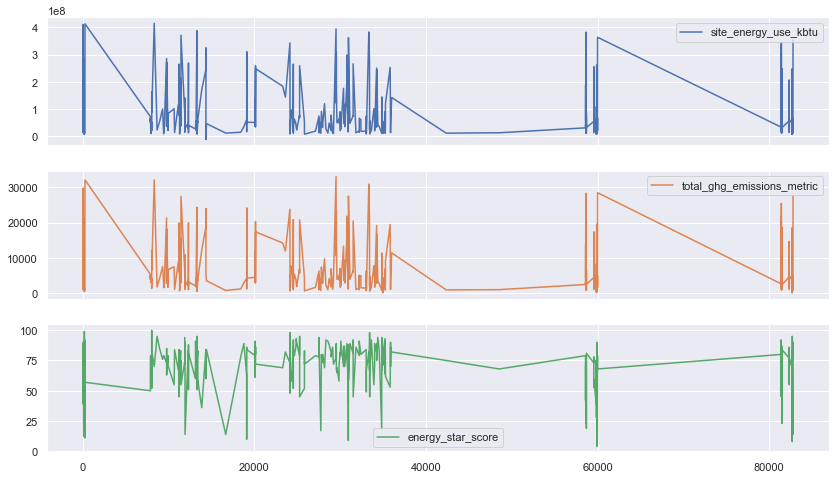

In [154]:
man_off[['site_energy_use_kbtu','total_ghg_emissions_metric','energy_star_score']].plot(subplots=True)

In [155]:
import plotly.graph_objects as go
list_scode = list(set(man_off['property_id']))


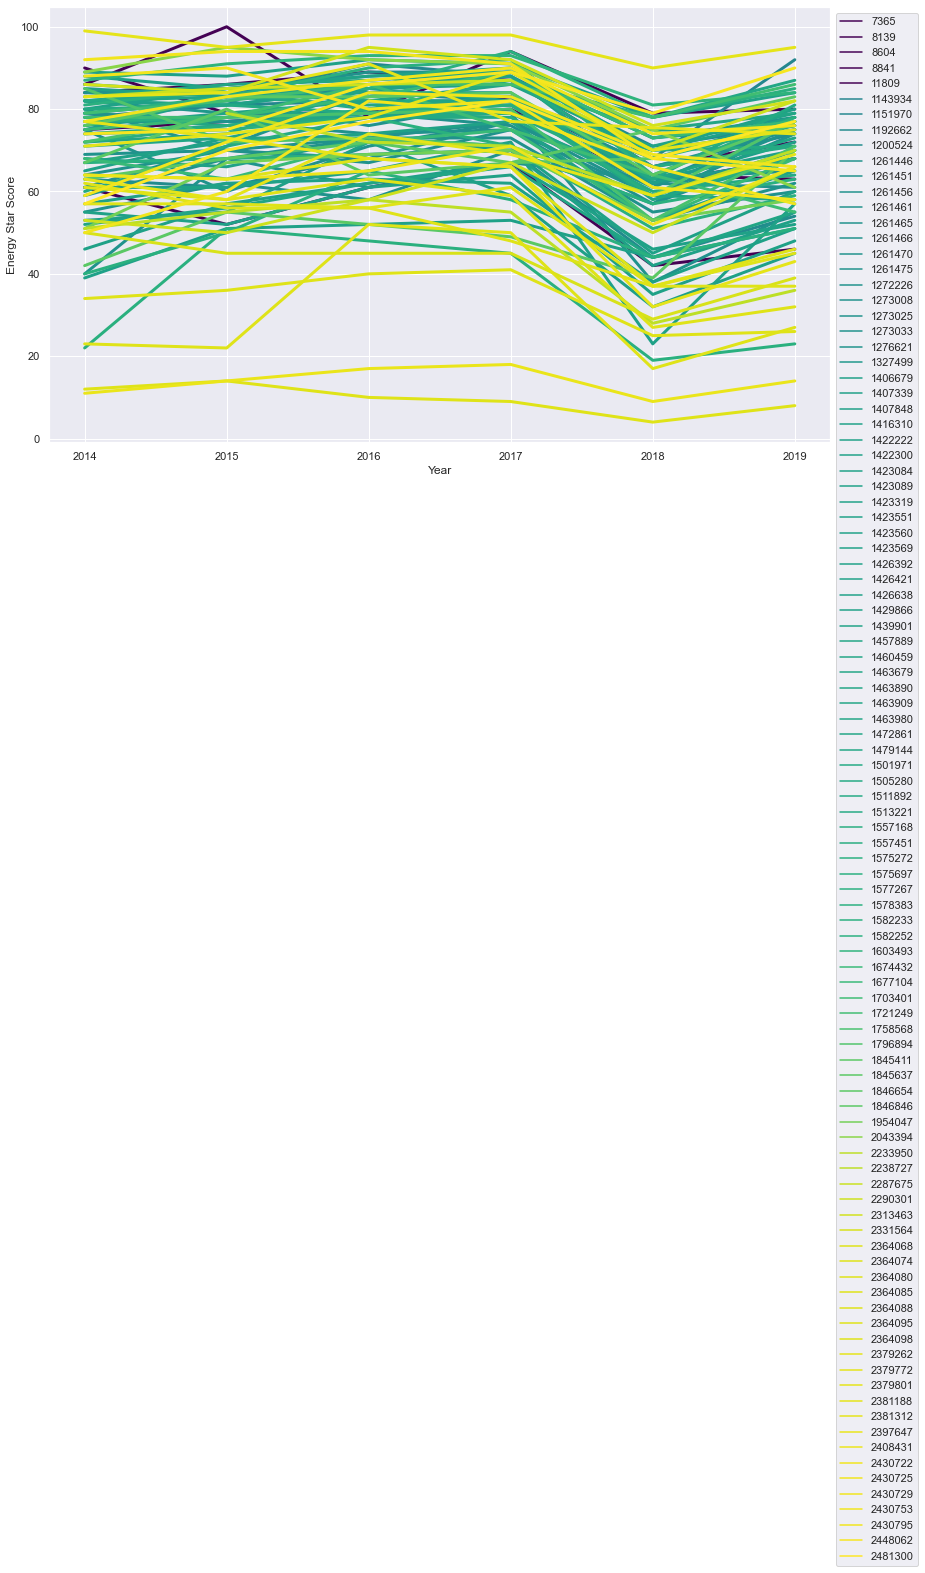

In [157]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=man_off, x ='Year', y = 'energy_star_score',
                  hue='property_id', palette='viridis',
                  legend='full', lw=3)

#ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Energy Star Score')
plt.xlabel('Year')
plt.show()

In [160]:
import matplotlib.ticker as ticker
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_scode)).as_hex())


In [173]:
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()

fig = go.Figure()
for d,p in zip(list_scode, pal):
    fig.add_trace(go.Scatter(x = man_off[man_off['property_id']==d]['Year'],
                             y = man_off[man_off['property_id']==d]['energy_star_score'],
                             name = str(d),
                             line_color = p, 
                             fill=None))   #tozeroy 

fig.show()

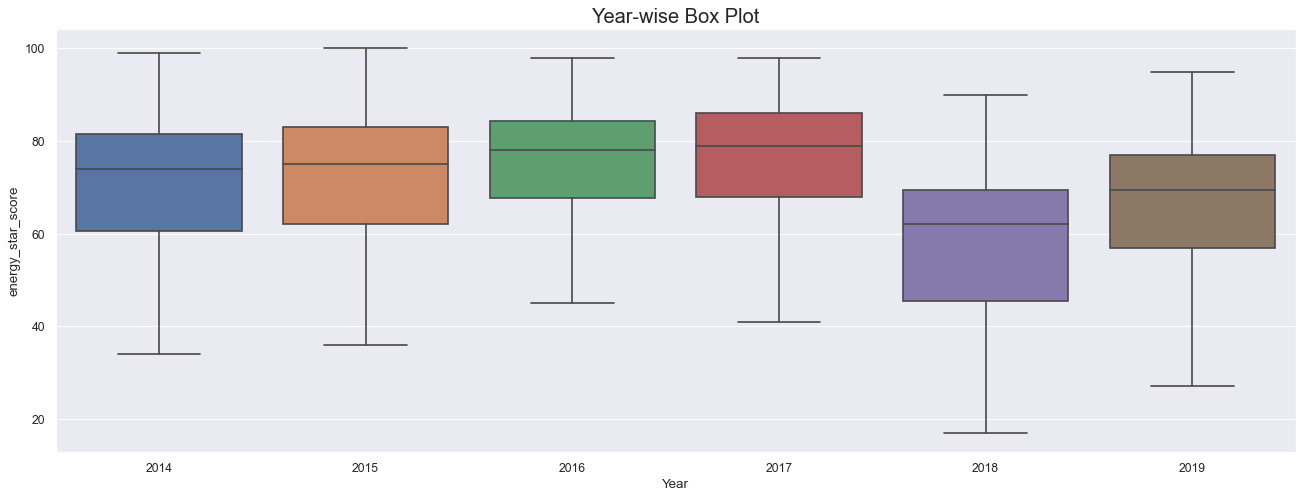

In [178]:
# Draw Plot
fig, axes = plt.subplots( figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='energy_star_score', data=man_off, showfliers=False)

# Set Title
axes.set_title('Year-wise Box Plot', fontsize=18); 
plt.show()

In [175]:
sam=man_off.set_index(man_off.columns[-1])

In [187]:
yearly_OS = pd.DataFrame()

yearly_OS['energy_star_score'] = man_off['energy_star_score'].resample('A').mean()
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(yearly_OS.index, yearly_OS.energy_star_score, linewidth=3)
plt.title(' Yearly Site Energy Use')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [40]:
# Calculate first and third quartile
first_quartile = data['site_eui_kbtu_ft'].describe()['25%']
third_quartile = data['site_eui_kbtu_ft'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['site_eui_kbtu_ft'] > (first_quartile - 3 * iqr)) &
            (data['site_eui_kbtu_ft'] < (third_quartile + 3 * iqr))]


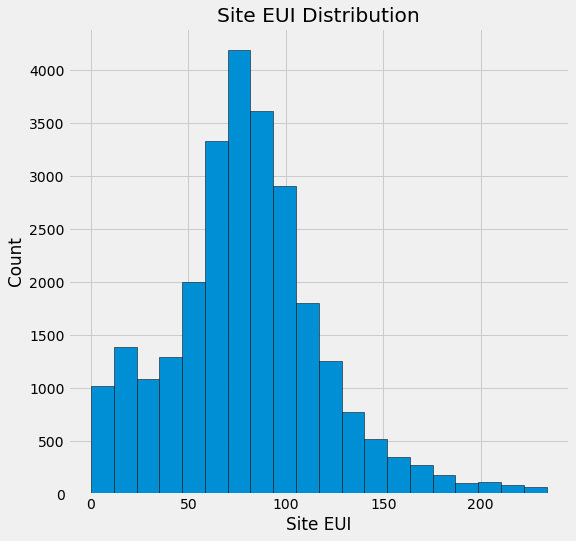

In [41]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['site_eui_kbtu_ft'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='primary_property_type_self'>

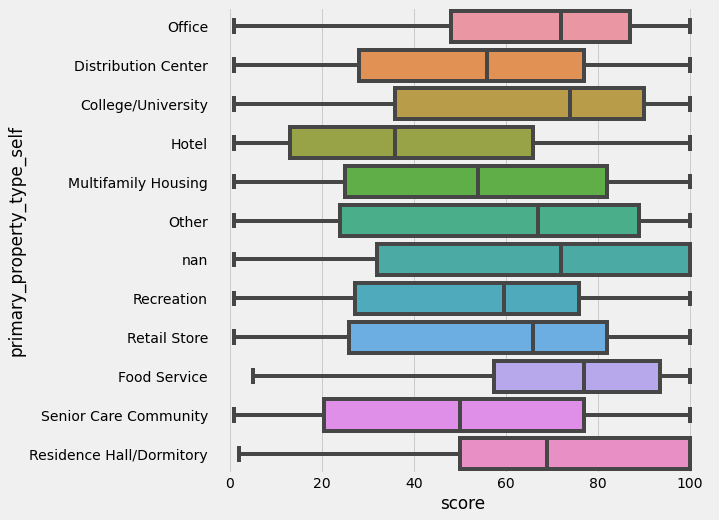

In [44]:
sns.boxplot(data['score'],data['primary_property_type_self'])

In [63]:
sim_prop[:5]

[7365, 8139, 8604, 8841, 11809]

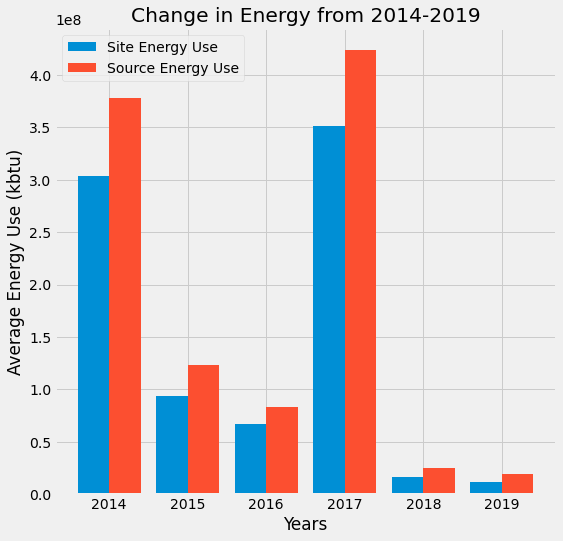

In [73]:
X = ['2014','2015','2016','2017','2018','2019']
site = [dfc_com_prop14['site_energy_use_kbtu'].mean(),dfc_com_prop15['site_energy_use_kbtu'].mean(),dfc_com_prop16['site_energy_use_kbtu'].mean(),dfc_com_prop17['site_energy_use_kbtu'].mean(),dfc_com_prop18['site_energy_use_kbtu'].mean(),dfc_com_prop19['site_energy_use_kbtu'].mean()]
source = [dfc_com_prop14['source_energy_use_kbtu'].mean(),dfc_com_prop15['source_energy_use_kbtu'].mean(),dfc_com_prop16['source_energy_use_kbtu'].mean(),dfc_com_prop17['source_energy_use_kbtu'].mean(),dfc_com_prop18['source_energy_use_kbtu'].mean(),dfc_com_prop19['source_energy_use_kbtu'].mean()]
emission=[dfc_com_prop14['egrid_output_emissions_rate'].mean(),dfc_com_prop15['egrid_output_emissions_rate'].mean(),dfc_com_prop16['egrid_output_emissions_rate'].mean(),dfc_com_prop17['egrid_output_emissions_rate'].mean(),dfc_com_prop18['egrid_output_emissions_rate'].mean(),dfc_com_prop19['egrid_output_emissions_rate'].mean()]  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, site, 0.4, label = 'Site Energy Use')
plt.bar(X_axis + 0.2, source, 0.4, label = 'Source Energy Use')
#plt.bar(X_axis + 0.4, emission, 0.6, label = 'Egrid Output Emissions Rate')
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Average Energy Use (kbtu)")
plt.title("Change in Energy from 2014-2019")
plt.legend()
plt.show()

/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_78375/1566061503.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_groups16=dfc_com_prop16.groupby('borough')['source_energy_use_kbtu','site_energy_use_kbtu'].mean()


Text(0.5, 1.0, 'Energy Use 2016 by Borough')

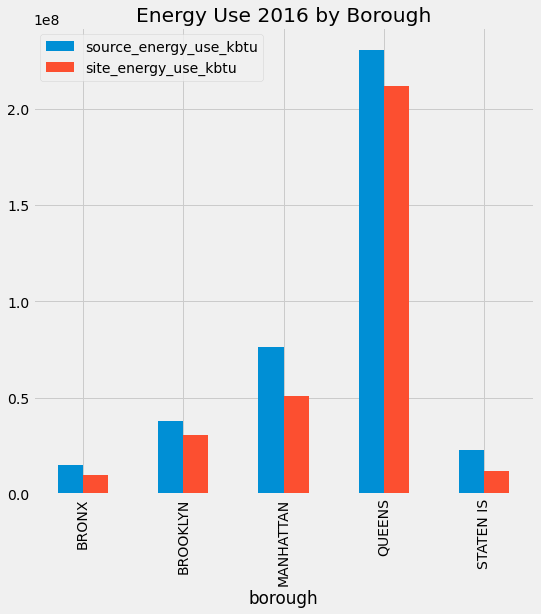

In [91]:
df_groups16=dfc_com_prop16.groupby('borough')['source_energy_use_kbtu','site_energy_use_kbtu'].mean()
df_groups16.plot(kind='bar')
plt.title("Energy Use 2016 by Borough")

Text(0.5, 1.0, 'Energy Star Score 2016 by Borough')

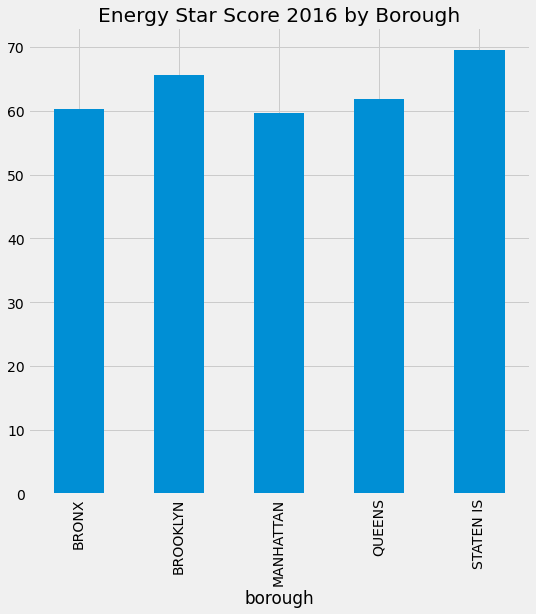

In [98]:
df_groups16=dfc_com_prop16.groupby('borough')['energy_star_score'].mean()
df_groups16.plot(kind='bar')
plt.title("Energy Star Score 2016 by Borough")

In [ ]:
X = ['2014','2015','2016','2017','2018','2019']
site = [dfc_com_prop14['site_energy_use_kbtu'].mean(),dfc_com_prop15['site_energy_use_kbtu'].mean(),dfc_com_prop16['site_energy_use_kbtu'].mean(),dfc_com_prop17['site_energy_use_kbtu'].mean(),dfc_com_prop18['site_energy_use_kbtu'].mean(),dfc_com_prop19['site_energy_use_kbtu'].mean()]
source = [dfc_com_prop14['source_energy_use_kbtu'].mean(),dfc_com_prop15['source_energy_use_kbtu'].mean(),dfc_com_prop16['source_energy_use_kbtu'].mean(),dfc_com_prop17['source_energy_use_kbtu'].mean(),dfc_com_prop18['source_energy_use_kbtu'].mean(),dfc_com_prop19['source_energy_use_kbtu'].mean()]
emission=[dfc_com_prop14['egrid_output_emissions_rate'].mean(),dfc_com_prop15['egrid_output_emissions_rate'].mean(),dfc_com_prop16['egrid_output_emissions_rate'].mean(),dfc_com_prop17['egrid_output_emissions_rate'].mean(),dfc_com_prop18['egrid_output_emissions_rate'].mean(),dfc_com_prop19['egrid_output_emissions_rate'].mean()]  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, site, 0.4, label = 'Site Energy Use')
plt.bar(X_axis + 0.2, source, 0.4, label = 'Source Energy Use')
#plt.bar(X_axis + 0.4, emission, 0.6, label = 'Egrid Output Emissions Rate')
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Average Energy Use (kbtu)")
plt.title("Change in Energy from 2014-2019")
plt.legend()
plt.show()

In [148]:
type(dfc_common17)

pandas.core.frame.DataFrame

In [139]:
print(site, source)

[229231371.79847014, 89050660.73852678, 58476653.210257776, 299420565.1024888, 16347463.544539751, 12325237.948754277] [291744290.3480334, 125545293.90761296, 76375345.42059651, 362188910.8289779, 25090218.66332827, 20149239.80411325]


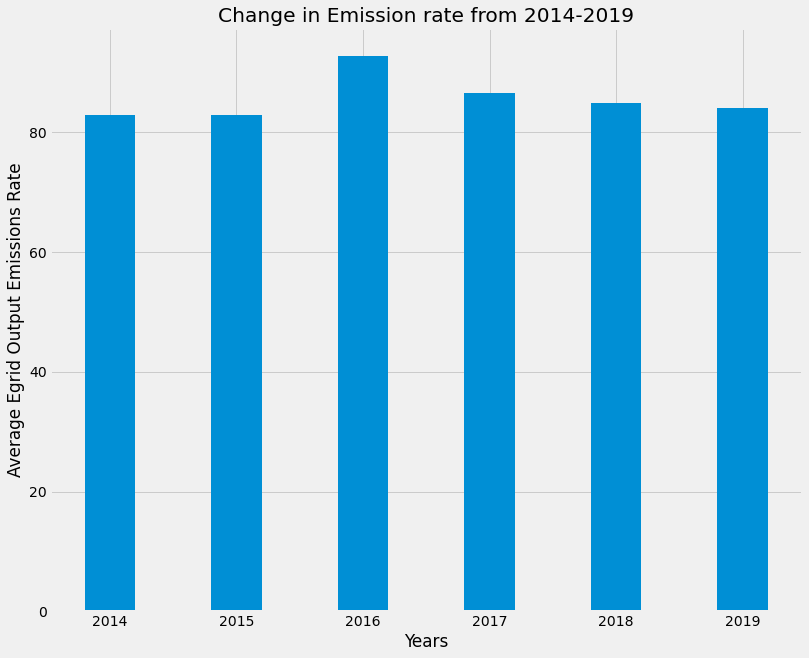

In [136]:
plt.bar(X, emission, 
        width = 0.4)
 
plt.xlabel("Years")
plt.ylabel("Average Egrid Output Emissions Rate")
plt.title("Change in Emission rate from 2014-2019")
plt.show()


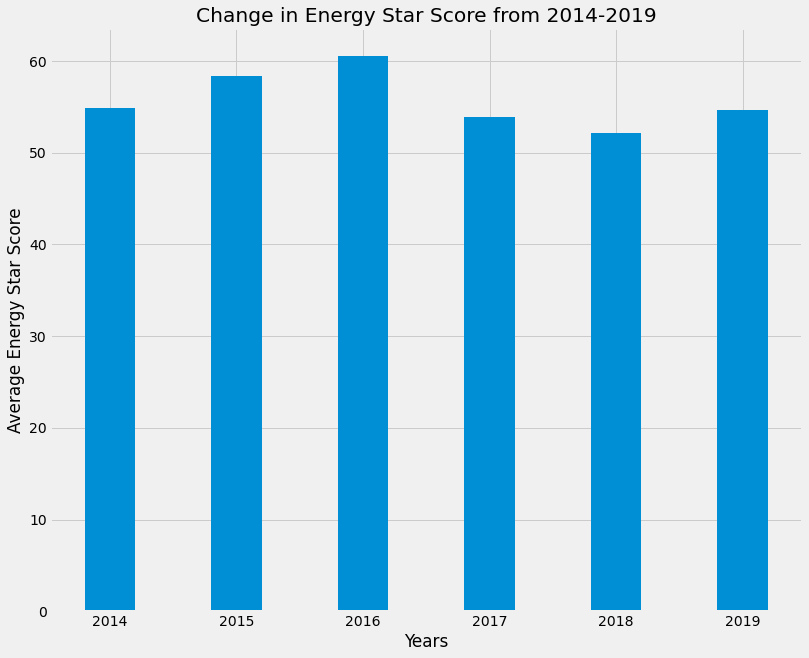

In [135]:
scores= [dfc_common14['energy_star_score'].mean(),dfc_common15['energy_star_score'].mean(),dfc_common16['energy_star_score'].mean(),dfc_common17['energy_star_score'].mean(),dfc_common18['energy_star_score'].mean(),dfc_common19['energy_star_score'].mean()]  

plt.bar(X, scores, 
        width = 0.4)
 
plt.xlabel("Years")
plt.ylabel("Average Energy Star Score")
plt.title("Change in Energy Star Score from 2014-2019")
plt.show()

In [15]:
important_variable=['property_id', 'year_built', 'number_of_buildings',
       'occupancy', 'score',
       'weather_normalized_site_electricity_intensity_kwh_ft',
       'weather_normalized_site_natural_gas_intensity_therms_ft',
       'electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kwh',
       'total_ghg_emissions_intensity_kgco2e_ft',
       'direct_ghg_emissions_intensity_kgco2e_ft',
       'egrid_output_emissions_rate_kgco2e_mbtu',
       'avoided_emissions_offsite_green_power_metric_tons_co2e',
       'percent_of_electricity_that_is_green_power',
       'multifamily_housing_number_of_bedrooms_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories',
       'multifamily_housing_total_number_of_residential_living_units_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_5_9_stories',
       'multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft',
       'multifamily_housing_percent_that_can_be_cooled',
       'multifamily_housing_percent_that_can_be_heated',
       'water_use_all_water_sources_kgal',
       'number_of_active_energy_meters_used_to_compute_metrics',
       'number_of_active_energy_meters_not_used_to_compute_metrics',
       'number_of_active_it_meters', 'community_board', 'census_tract',
       'longitude', 'latitude']

In [150]:
data = dfc_common17.rename(columns = {'energy_star_score': 'score'})

SyntaxError: invalid syntax (3186340987.py, line 1)

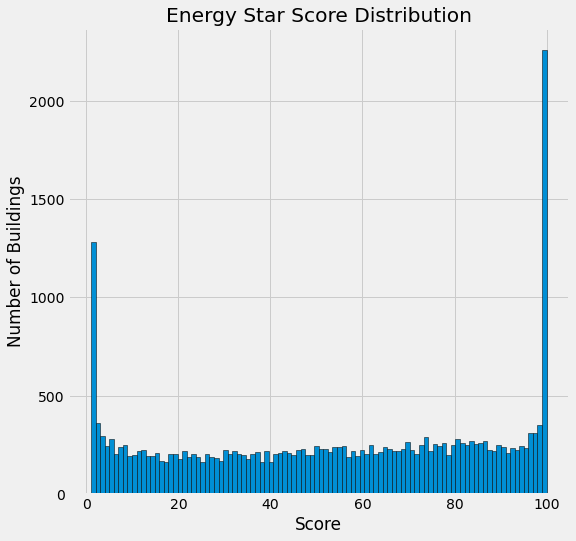

In [151]:
figsize(8, 8)
# Rename the score 
data = dfc_common17.rename(columns = {'energy_star_score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

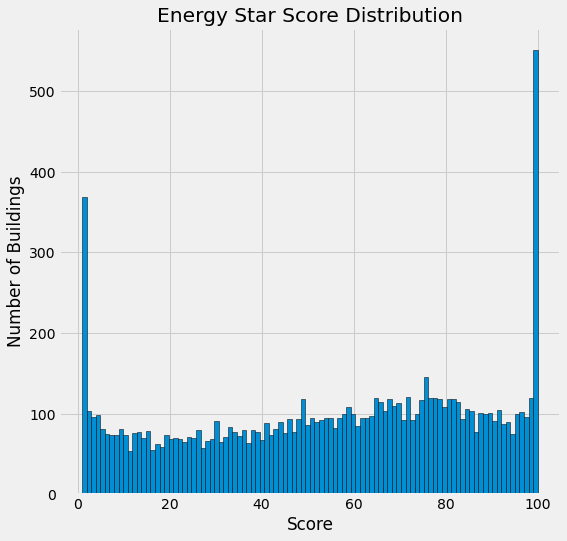

In [56]:
figsize(8, 8)
# Rename the score 
data = dfc_reduced14.rename(columns = {'energy_star_score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

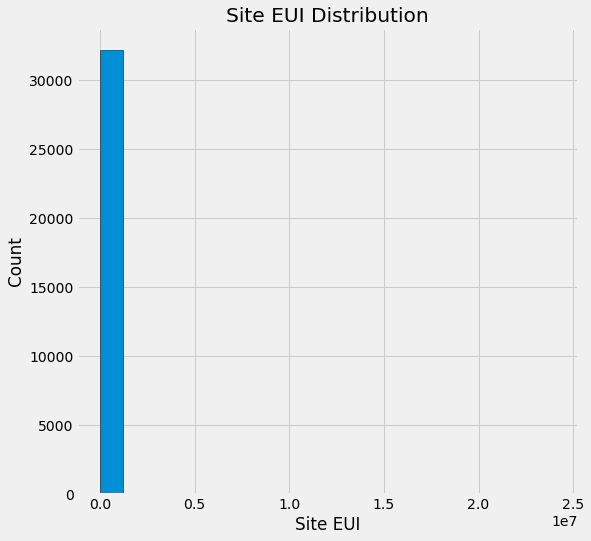

In [152]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['site_eui_kbtu_ft'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [153]:
# Calculate first and third quartile
first_quartile = data['site_eui_kbtu_ft'].describe()['25%']
third_quartile = data['site_eui_kbtu_ft'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['site_eui_kbtu_ft'] > (first_quartile - 3 * iqr)) &
            (data['site_eui_kbtu_ft'] < (third_quartile + 3 * iqr))]


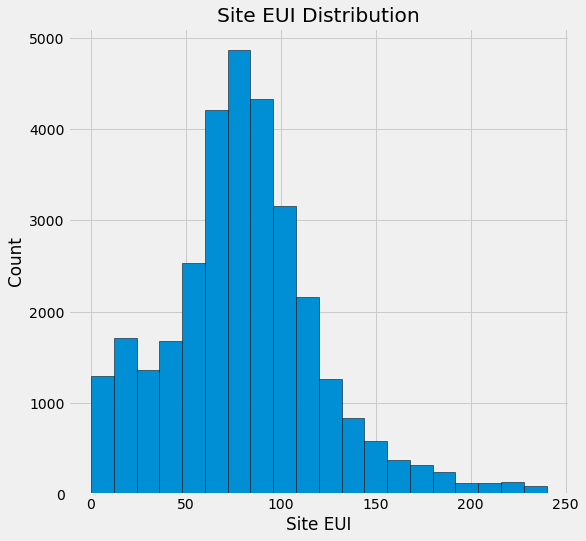

In [154]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['site_eui_kbtu_ft'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [156]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['primary_property_type_self'].value_counts()
types = list(types[types.values > 100].index)

In [157]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['primary_property_type_self'].value_counts()
types = list(types[types.values > 100].index)

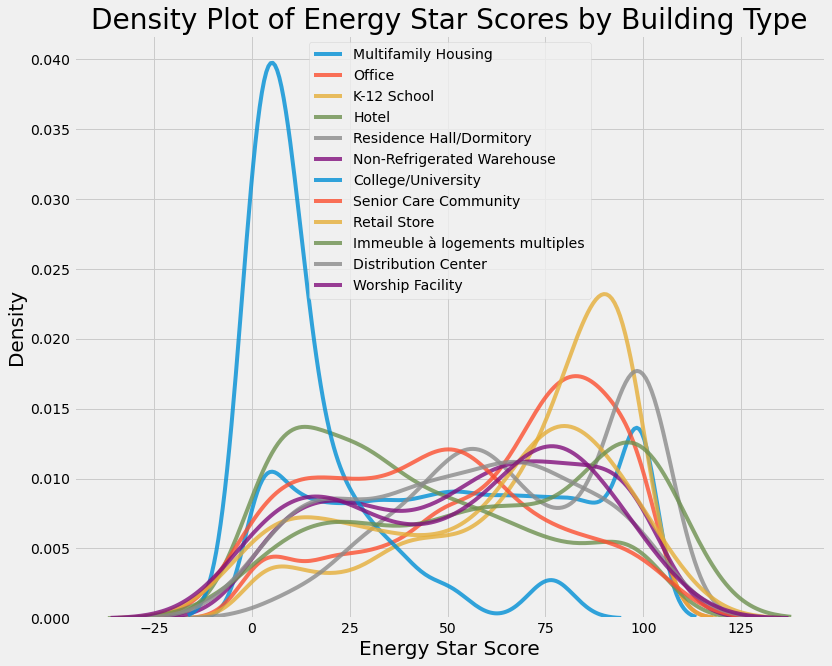

In [158]:
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['primary_property_type_self'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);
plt.legend()

In [164]:
types

['Multifamily Housing',
 'Office',
 'K-12 School',
 'Hotel',
 'Residence Hall/Dormitory',
 'Non-Refrigerated Warehouse',
 'College/University',
 'Senior Care Community',
 'Retail Store',
 'Immeuble à logements multiples',
 'Distribution Center',
 'Worship Facility']

In [166]:
#property type dictionary
property_type = {'Multifamily Housing':'Multifamily Housing',  
            'Residence Hall/Dormitory':'Residence Hall/Dormitory',
            'Other - Lodging/Residential':'Residence Hall/Dormitory',
            'Hotel':'Hotel',
            'Adult Education':'College/University',
            'College/University':'College/University',
            'K-12 School':'College/University',
            'Library':'College/University',
            'Vocational School':'College/University',
            'Other - Education':'College/University',
            'Office':'Office',
            'Medical Office':'Office',
            'Financial Office':'Office',
                 'Immeuble à logements multiples':'Immeuble à logements multiples',
            'Bank Branch':'Office',
            'Distribution Center':'Distribution Center',
            'Self-Storage Facility':'Distribution Center',
            'Wholesale Club/Supercenter':'Distribution Center',
            'Non-Refrigerated Warehouse':'Distribution Center',
            'Fast Food Restaurant':'Food Service',
            'Food Sales':'Food Service',
            'Food Service':'Food Service',
            'Restaurant':'Food Service',
                 'Supermarket/Grocery Store':'Food Service',
            'Convenience Store without Gas Station':'Food Service',
            'Other - Restaurant/Bar':'Food Service',
            'Hospital (General Medical & Surgical)':'Senior Care Community',
            'Urgent Care/Clinic/Other Outpatient':'Senior Care Community',
            'Ambulatory Surgical Center':'Senior Care Community',
            'Laboratory':'Senior Care Community',
            'Pre-school/Daycare':'Senior Care Community',
            'Senior Care Community':'Senior Care Community',
            'Outpatient Rehabilitation/Physical Therapy':'Senior Care Community',
            'Retail Store':'Retail Store',
            'Repair Services (Vehicle, Shoe, Locksmith, etc.)':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Automobile Dealership':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Personal Services (Health/Beauty, Dry Cleaning...':'Retail Store',
            'Enclosed Mall':'Retail Store',
            'Other - Mall':'Retail Store',
            'Other - Services':'Retail Store',
            'Other - Utility':'Retail Store',
            'Bar/Nightclub':'Recreation',
            'Bowling Alley':'Recreation',
                 'Fitness Center/Health Club/Gym':'Recreation',
            'Other - Recreation':'Recreation',
            'Other - Entertainment/Public Assembly':'Recreation',
            'Performing Arts':'Recreation',
            'Social/Meeting Hall':'Recreation',
            'Museum':'Recreation',
            'Worship Facility':'Recreation',
            'Other':'Other',
            'Courthouse':'Other',
            'Other - Public Services':'Other',
            'Swimming Pool':'Other',
            'Parking':'Other',
            'Refrigerated Warehouse':'Other',
            'Data Center':'Other',
            'none':'none'
              }

In [167]:
#fit to dicitonary
data['primary_property_type_self'] = data['primary_property_type_self'].map(property_type).astype(str)


In [168]:
# Create a list of buildings with more than 100 measurements
types_1 = data.dropna(subset=['score'])
types_1 = types_1['primary_property_type_self'].value_counts()
types_1 = list(types_1[types_1.values > 100].index)

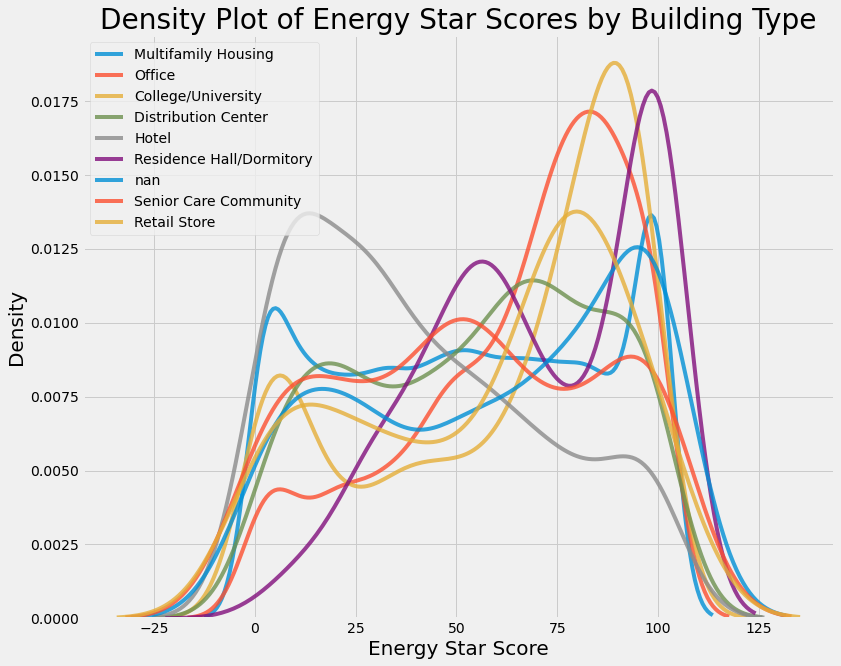

In [169]:
figsize(12, 10)

# Plot each building
for b_type in types_1:
    # Select the building type
    subset = data[data['primary_property_type_self'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);
plt.legend()

# Find ing model by property type

In [170]:
prop_type=data.groupby(['primary_property_type_self']).count()

In [171]:
prop_type

property_id  property_name  year_ending  \
primary_property_type_self                                            
College/University                 2525           2525         2525   
Distribution Center                 890            890          890   
Food Service                         74             74           74   
Hotel                               484            484          484   
Multifamily Housing               21475          21475        21475   
Office                             2664           2664         2664   
Other                               521            521          521   
Residence Hall/Dormitory            568            568          568   
Retail Store                        440            440          440   
Senior Care Community               410            410          410   
nan                                1359           1359         1359   

                            nyc_building_identification  \
primary_property_type_self                                
College/University                                 2448   
Distribution Center                                 828   
Food Service                                         69   
Hotel                                               433   
Multifamily Housing                               20901   
Office                                             2575   
Other                                               500   
Residence Hall/Dormitory                            555   
Retail Store                                        416   
Senior Care Community                               391   
nan                                                1266   

                            nyc_borough_block_and_lot  address_1   city  \
primary_property_type_self                                                
College/University                               2493       2525   2525   
Distribution Center                               849        890    890   
Food Service                                       71         74     74   
Hotel                                             479        484    484   
Multifamily Housing                             21106      21475  21475   
Office                                           2617       2664   2664   
Other                                             507        521    521   
Residence Hall/Dormitory                          561        568    568   
Retail Store                                      435        440    440   
Senior Care Community                             403        410    410   
nan                                              1295       1359   1359   

                            postcode  year_built  number_of_buildings  ...  \
primary_property_type_self                                             ...   
College/University              2525        2525                 2525  ...   
Distribution Center              890         890                  890  ...   
Food Service                      74          74                   74  ...   
Hotel                            484         484                  484  ...   
Multifamily Housing            21475       21475                21475  ...   
Office                          2664        2664                 2664  ...   
Other                            521         521                  521  ...   
Residence Hall/Dormitory         568         568                  568  ...   
Retail Store                     440         440                  440  ...   
Senior Care Community            410         410                  410  ...   
nan                             1359        1359                 1359  ...   

                            egrid_output_emissions_rate  \
primary_property_type_self                                
College/University                                 2523   
Distribution Center                                 890   
Food Service                                         74   
Hotel                                             

/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='primary_property_type_self'>

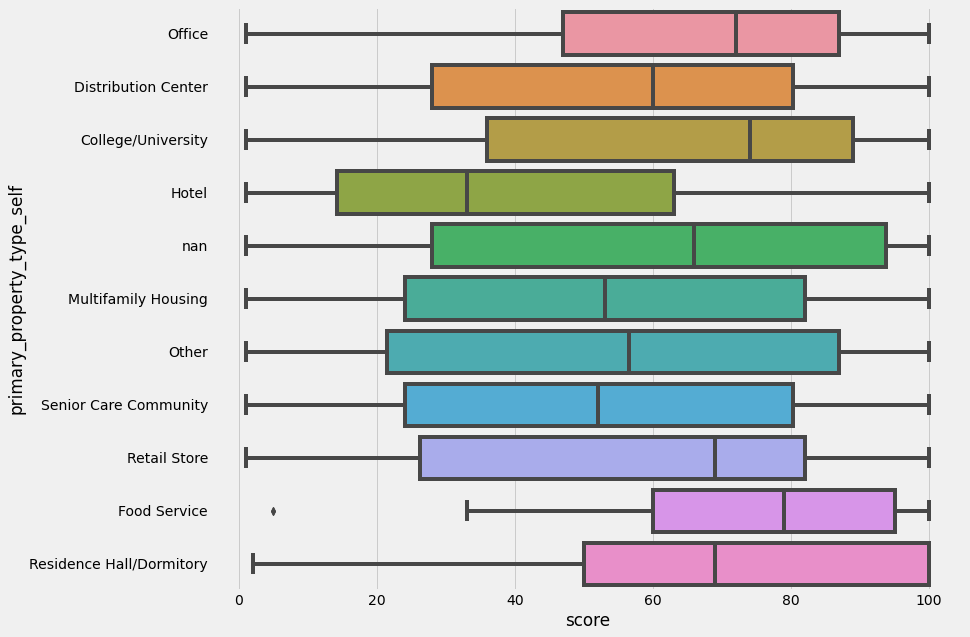

In [172]:
sns.boxplot(data['score'],data['primary_property_type_self'])

In [204]:
multifam=data[data['largest_property_use_type']=='Multifamily Housing']
college=data[data['largest_property_use_type']=='College/University']
office=data[data['largest_property_use_type']=='Office']
d_center=data[data['largest_property_use_type']=='Distribution Center']
hotel=data[data['largest_property_use_type']=='Hotel']
other=data[data['largest_property_use_type']=='Other']
rec=data[data['largest_property_use_type']=='Recreation']
dorm=data[data['largest_property_use_type']=='Residence Hall/Dormitory']
sen_care=data[data['largest_property_use_type']=='Senior Care Community']
retail=data[data['largest_property_use_type']=='Retail Store']

In [170]:
multifam.shape

(95418, 87)

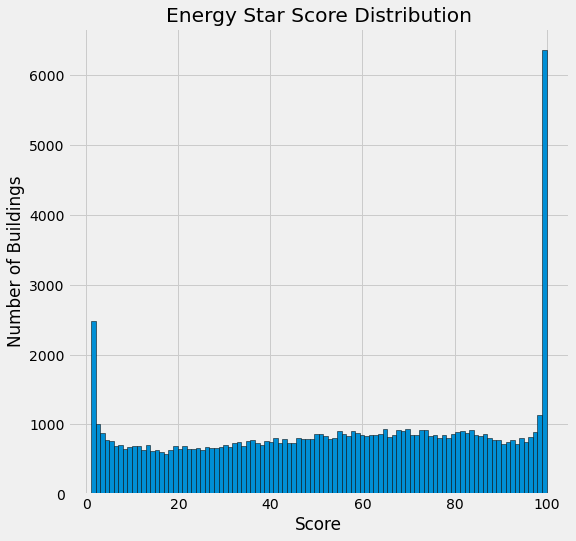

In [248]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(multifam['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

In [206]:
#remove variables that will not help with predicting
rec.drop(['property_id','community_board', 'longitude', 'latitude','national_median_site_eui','council_district',
 'census_tract','national_median_source_eui','year_built','number_of_buildings','occupancy'], axis=1, inplace=True)


/Users/Lucy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [207]:
# Find all correlations and sort 
correlations_data = rec.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

difference_from_national_1       -0.872788
difference_from_national         -0.872788
source_eui_kbtu_ft               -0.848360
weather_normalized_source        -0.847042
weather_normalized_site_eui      -0.818822
site_eui_kbtu_ft                 -0.817390
weather_normalized_site          -0.672578
weather_normalized_site_1        -0.532137
site_energy_use_kbtu             -0.509477
weather_normalized_site_energy   -0.504881
source_energy_use_kbtu           -0.493856
weather_normalized_source_1      -0.490485
total_ghg_emissions_metric       -0.488275
net_emissions_metric_tons        -0.487541
indirect_ghg_emissions_metric    -0.439685
Name: score, dtype: float64 

egrid_output_emissions_rate     0.082172
national_median_total_ghg       0.094187
largest_property_use_type_1     0.095626
property_gfa_self_reported      0.096414
property_gfa_calculated_1       0.101567
property_gfa_calculated         0.102246
score                           1.000000
multifamily_housing_gross            N

In [208]:
#identify and drop highly correlated variable
correlated_features = set()
correlation_matrix = rec.drop('score',axis=1).corr()
threshold = 0.70

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [209]:
correlated_features

{'avoided_emissions_offsite',
 'difference_from_national',
 'difference_from_national_1',
 'direct_ghg_emissions_metric',
 'electricity_use_grid_purchase',
 'electricity_use_grid_purchase_1',
 'indirect_ghg_emissions_metric',
 'multifamily_housing_gross',
 'multifamily_housing_number',
 'multifamily_housing_number_4',
 'multifamily_housing_number_5',
 'multifamily_housing_number_7',
 'multifamily_housing_total',
 'multifamily_housing_total_1',
 'national_median_total_ghg',
 'net_emissions_metric_tons',
 'property_gfa_calculated',
 'property_gfa_calculated_1',
 'property_gfa_self_reported',
 'source_energy_use_kbtu',
 'source_eui_kbtu_ft',
 'total_ghg_emissions_metric',
 'weather_normalized_site',
 'weather_normalized_site_1',
 'weather_normalized_site_2',
 'weather_normalized_site_3',
 'weather_normalized_site_energy',
 'weather_normalized_site_eui',
 'weather_normalized_source',
 'weather_normalized_source_1'}

In [178]:
multifam=multifam.drop(correlated_features,axis=1) 

In [179]:
# Select the numeric columns
numeric_subset = multifam.select_dtypes('number')

# # Create columns with square root and log of numeric columns
# for col in numeric_subset.columns:
#     # Skip the Energy Star Score column
#     if col == 'score':
#         next
#     else:
#         numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
#         numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = multifam[['borough', 'largest_property_use_type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

In [247]:
# Print the most negative correlations
print(correlations.head(5), '\n')

# Print the most positive correlations
print(correlations.tail(5))

site_eui_kbtu_ft            -0.790127
weather_normalized_site     -0.481851
weather_normalized_site_1   -0.424858
site_energy_use_kbtu        -0.102392
borough_BRONX               -0.072589
Name: score, dtype: float64 

borough_QUEENS                  0.041290
borough_BROOKLYN                0.076964
multifamily_housing_number_6    0.100560
multifamily_housing_number_7    0.136792
score                           1.000000
Name: score, dtype: float64


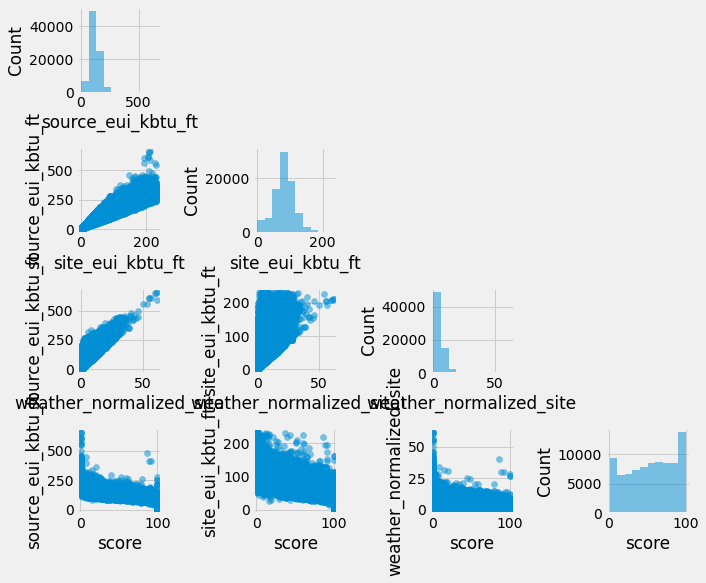

In [126]:
cols=['source_eui_kbtu_ft','site_eui_kbtu_ft','weather_normalized_site','score']

import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(features[cols].values, figsize=(10, 8), 
                  names=cols, alpha=0.5)
plt.tight_layout()
#plt.savefig('images/10_03.png', dpi=300)
plt.show()


In [181]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85651 entries, 48 to 149598
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   score                                          85651 non-null  float64
 1   site_eui_kbtu_ft                               85651 non-null  float64
 2   site_energy_use_kbtu                           85651 non-null  float64
 3   green_power_offsite_kwh                        84742 non-null  float64
 4   weather_normalized_site                        66743 non-null  float64
 5   weather_normalized_site_1                      62997 non-null  float64
 6   egrid_output_emissions_rate                    68691 non-null  float64
 7   percent_of_electricity_that                    67970 non-null  float64
 8   multifamily_housing_total                      68768 non-null  float64
 9   multifamily_housing_number_5                   6

In [182]:
# fill in nan with mean
for i in features.columns:
    mean_value=features[i].mean()
    features[i].fillna(value=mean_value, inplace=True)

In [183]:
features.drop('largest_property_use_type_Multifamily Housing', axis=1, inplace=True)

In [184]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85651 entries, 48 to 149598
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   score                         85651 non-null  float64
 1   site_eui_kbtu_ft              85651 non-null  float64
 2   site_energy_use_kbtu          85651 non-null  float64
 3   green_power_offsite_kwh       85651 non-null  float64
 4   weather_normalized_site       85651 non-null  float64
 5   weather_normalized_site_1     85651 non-null  float64
 6   egrid_output_emissions_rate   85651 non-null  float64
 7   percent_of_electricity_that   85651 non-null  float64
 8   multifamily_housing_total     85651 non-null  float64
 9   multifamily_housing_number_5  85651 non-null  float64
 10  multifamily_housing_number_6  85651 non-null  float64
 11  multifamily_housing_number_7  85651 non-null  float64
 12  borough_BRONX                 85651 non-null  uint8  
 13 

In [185]:
sc=StandardScaler()
standard=features.copy()
sub=standard.select_dtypes(include=[np.number])
standard[sub.columns[1:51]]=sc.fit_transform(standard[sub.columns[1:51]])
standard.head()

score  site_eui_kbtu_ft  site_energy_use_kbtu  green_power_offsite_kwh  \
48     75.0         -1.146811              0.757139                -0.006275   
70     68.0         -0.127552              1.892033                -0.006275   
1088   70.0         -0.483246              1.163875                -0.006275   
1095   15.0          0.661552              1.206991                -0.006275   
1096   14.0          0.670520              0.691988                -0.006275   

      weather_normalized_site  weather_normalized_site_1  \
48               1.312242e-14              -1.656196e-13   
70               1.312242e-14              -1.656196e-13   
1088             1.312242e-14              -1.656196e-13   
1095             1.312242e-14              -1.656196e-13   
1096             1.312242e-14              -1.656196e-13   

      egrid_output_emissions_rate  percent_of_electricity_that  \
48                   1.831362e-11                -1.487634e-17   
70                   1.831362e-11                -1.487634e-17   
1088                 1.831362e-11                -1.487634e-17   
1095                 1.831362e-11                -1.487634e-17   
1096                 1.831362e-11                -1.487634e-17   

      multifamily_housing_total  multifamily_housing_number_5  \
48                 1.542687e-15                  4.063279e-16   
70                 1.542687e-15                  4.063279e-16   
1088               1.542687e-15                  4.063279e-16   
1095               1.542687e-15                  4.063279e-16   
1096               1.542687e-15                  4.063279e-16   

      multifamily_housing_number_6  multifamily_housing_number_7  \
48                   -4.070083e-16                 -1.458745e-15   
70                   -4.070083e-16                 -1.458745e-15   
1088                 -4.070083e-16                 -1.458745e-15   
1095                 -4.070083e-16                 -1.458745e-15   
1096                 -4.070083e-16                 -1.458745e-15   

      borough_BRONX  borough_BROOKLYN  borough_MANHATTAN  borough_QUEENS  \
48        -0.537887         -0.568438           1.409853       -0.428807   
70        -0.537887         -0.568438           1.409853       -0.428807   
1088      -0.537887         -0.568438          -0.709294       -0.428807   
1095      -0.537887         -0.568438           1.409853       -0.428807   
1096      -0.537887         -0.568438          -0.709294       -0.428807   

      borough_STATEN IS  
48            -0.094995  
70            -0.094995  
1088          -0.094995  
1095          -0.094995  
1096          -0.094995

In [186]:
sc=Normalizer()
normalized=features.copy()
sub=normalized.select_dtypes(include=[np.number])
normalized[sub.columns[1:51]]=sc.fit_transform(standard[sub.columns[1:51]])
normalized.head()

score  site_eui_kbtu_ft  site_energy_use_kbtu  green_power_offsite_kwh  \
48     75.0         -0.530028              0.349931                -0.002900   
70     68.0         -0.050462              0.748528                -0.002482   
1088   70.0         -0.283938              0.683850                -0.003687   
1095   15.0          0.305556              0.557482                -0.002898   
1096   14.0          0.448318              0.462672                -0.004195   

      weather_normalized_site  weather_normalized_site_1  \
48               6.064867e-15              -7.654537e-14   
70               5.191504e-15              -6.552256e-14   
1088             7.710255e-15              -9.731200e-14   
1095             6.060955e-15              -7.649600e-14   
1096             8.773812e-15              -1.107353e-13   

      egrid_output_emissions_rate  percent_of_electricity_that  \
48                   8.464114e-12                -6.875486e-18   
70                   7.245251e-12                -5.885391e-18   
1088                 1.076041e-11                -8.740793e-18   
1095                 8.458656e-12                -6.871052e-18   
1096                 1.224471e-11                -9.946504e-18   

      multifamily_housing_total  multifamily_housing_number_5  \
48                 7.129927e-16                  1.877950e-16   
70                 6.103192e-16                  1.607518e-16   
1088               9.064264e-16                  2.387434e-16   
1095               7.125328e-16                  1.876738e-16   
1096               1.031459e-15                  2.716758e-16   

      multifamily_housing_number_6  multifamily_housing_number_7  \
48                   -1.881094e-16                 -6.741966e-16   
70                   -1.610210e-16                 -5.771099e-16   
1088                 -2.391432e-16                 -8.571051e-16   
1095                 -1.879881e-16                 -6.737618e-16   
1096                 -2.721307e-16                 -9.753346e-16   

      borough_BRONX  borough_BROOKLYN  borough_MANHATTAN  borough_QUEENS  \
48        -0.248599         -0.262719           0.651600       -0.198184   
70        -0.212799         -0.224886           0.557767       -0.169645   
1088      -0.316043         -0.333994          -0.416755       -0.251951   
1095      -0.248438         -0.262549           0.651180       -0.198056   
1096      -0.359638         -0.380065          -0.474242       -0.286705   

      borough_STATEN IS  
48            -0.043904  
70            -0.037582  
1088          -0.055815  
1095          -0.043876  
1096          -0.063515

In [187]:
X=features.drop('score', axis=1)
y=features['score']
X_n=normalized.drop('score', axis=1)
y_n=normalized['score']
X_r=standard.drop('score', axis=1)
y_r=standard['score']

In [188]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(54816, 16)
(13704, 16)
(17131, 16)
(54816,)
(13704,)
(17131,)


In [195]:
# Split into 80% training and 20% testing set
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size = 0.2, random_state = 42)
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_r, y_train_r, test_size=0.20, random_state=1)


In [250]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train['site_eui_kbtu_ft'])
results = model.fit()
y_test_pred=results.predict(y_test)
y_train_pred=results.predict(y_train)
mse=mean_squared_error(y_test, y_test_pred)
print('MSE base: %.3f' % mse)
print(results.summary())

MSE base: 1130.534
                                 OLS Regression Results                                
Dep. Variable:                  score   R-squared (uncentered):                   0.442
Model:                            OLS   Adj. R-squared (uncentered):              0.442
Method:                 Least Squares   F-statistic:                          4.349e+04
Date:                Fri, 08 Jul 2022   Prob (F-statistic):                        0.00
Time:                        12:54:26   Log-Likelihood:                     -2.8872e+05
No. Observations:               54816   AIC:                                  5.774e+05
Df Residuals:                   54815   BIC:                                  5.775e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [196]:
# Split into 80% training and 20% testing set
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size = 0.2, random_state = 42)
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(X_train_n, y_train_n, test_size=0.20, random_state=1)


In [189]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 57.00
Baseline Performance on the test set: MAE = 26.3920


In [190]:
def dtree(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))

In [191]:
dtree(X_train, X_val, y_train, y_val, X_test, y_test )

MSE train: 0.062, val: 239.896
R^2 train: 1.000, val: 0.745


In [197]:
dtree(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MSE train: 0.063, val: 255.197
R^2 train: 1.000, val: 0.729


In [200]:
dtree(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MSE train: 0.063, val: 240.997
R^2 train: 1.000, val: 0.744


In [192]:
def gbr(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg = GradientBoostingRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    

In [193]:
gbr(X_train, X_val, y_train, y_val, X_test, y_test )

MSE train: 143.124, val: 145.142
R^2 train: 0.849, val: 0.846


In [199]:
gbr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MSE train: 148.112, val: 150.011
R^2 train: 0.844, val: 0.841


In [201]:
gbr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MSE train: 143.124, val: 145.143
R^2 train: 0.849, val: 0.846


In [252]:
from sklearn.svm import SVR

In [253]:
def svr(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg = SVR()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    

In [254]:
gbr(X_train, X_val, y_train, y_val, X_test, y_test )

MSE train: 143.124, val: 145.144
R^2 train: 0.849, val: 0.846


In [255]:
gbr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MSE train: 148.112, val: 150.011
R^2 train: 0.844, val: 0.841


In [256]:
gbr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MSE train: 143.124, val: 145.144
R^2 train: 0.849, val: 0.846


In [243]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

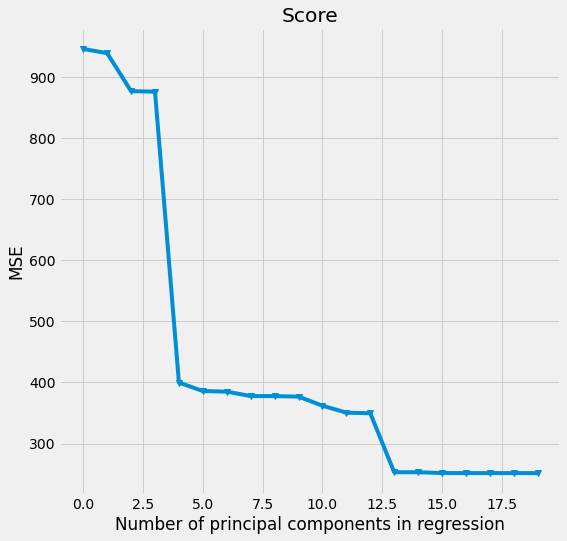

In [244]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [245]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([14.38, 26.33, 36.88, 46.18, 54.7 , 62.37, 69.68, 76.01, 82.22,
       87.39, 91.17, 93.82, 96.33, 98.28, 99.72, 99.99])

In [246]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = DecisionTreeRegressor()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

KeyboardInterrupt: 

In [251]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = GradientBoostingRegressor()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

KeyboardInterrupt: 

In [220]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA()
pca.fit(X_train_sc)
# show the results
pca.components_
pca.explained_variance_
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_) 

array([0.14344059, 0.26250198, 0.36349586, 0.45633094, 0.54185459,
       0.61874203, 0.69175345, 0.75490083, 0.81694581, 0.86881166,
       0.90683268, 0.93350739, 0.958566  , 0.98259236, 0.99725608,
       1.        ])

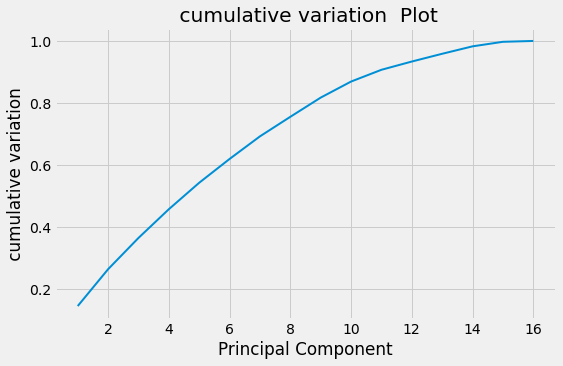

In [222]:
# generate the Scree plot for PCs
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(16) + 1
plt.plot(sing_vals, np.cumsum(pca.explained_variance_ratio_), linewidth=2)
plt.title(' cumulative variation  Plot')
plt.xlabel('Principal Component')
plt.ylabel(' cumulative variation ')
plt.show()

In [217]:
principal_Df = pd.DataFrame(data = X_train_pca
             , columns = ['principal component 1', 'principal component 2'])

In [218]:
principal_Df.tail()

principal component 1  principal component 2
54811               0.869627              -0.284183
54812              -0.441225              -0.376926
54813              -1.191270              -0.313020
54814              -2.535587               1.336062
54815              -1.750850               0.154097

In [219]:
print('Explained variation per principal component: {}'.format(explained_variance))

Explained variation per principal component: [0.14344059 0.1190606 ]


In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [210]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [211]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [213]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [214]:
history = NN_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/200
1370/1371 [============================>.] - ETA: 0s - loss: 348.6354 - mean_squared_error: 20217294.0000
Epoch 1: val_loss improved from inf to 154.93478, saving model to Weights-001--154.93478.hdf5
1371/1371 [==============================] - 43s 30ms/step - loss: 348.5920 - mean_squared_error: 20211774.0000 - val_loss: 154.9348 - val_mean_squared_error: 110179.7031
Epoch 2/200
1371/1371 [==============================] - ETA: 0s - loss: 54.9928 - mean_squared_error: 27641.3945
Epoch 2: val_loss improved from 154.93478 to 45.84657, saving model to Weights-002--45.84657.hdf5
1371/1371 [==============================] - 36s 26ms/step - loss: 54.9928 - mean_squared_error: 27641.3945 - val_loss: 45.8466 - val_mean_squared_error: 4763.8535
Epoch 3/200
1369/1371 [============================>.] - ETA: 0s - loss: 46.2291 - mean_squared_error: 8355.4492
Epoch 3: val_loss improved from 45.84657 to 43.50563, saving model to Weights-003--43.50563.hdf5
1371/1371 [====================

KeyboardInterrupt: 

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
weights_file = 'Weights-005--37.41953.hdf5'
NN_model.load_weights(weights_file)
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
predictions = NN_model.predict(X_test)
list(zip(y_test, predictions))

# Find model by borough

In [28]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

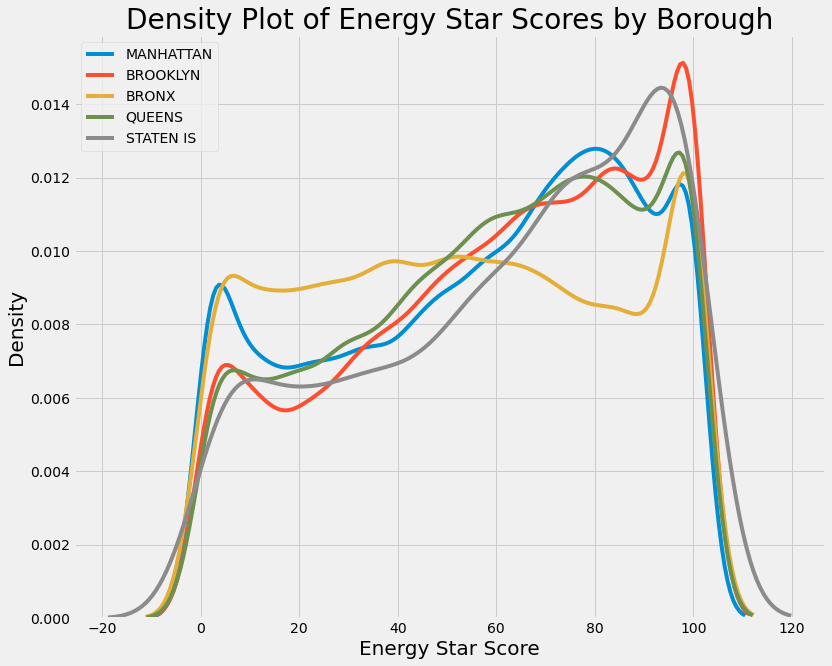

In [29]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);
plt.legend()

In [30]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

difference_from_national_1       -0.867565
difference_from_national         -0.867565
site_eui_kbtu_ft                 -0.744379
weather_normalized_site_eui      -0.737747
source_eui_kbtu_ft               -0.657722
weather_normalized_source        -0.655852
direct_ghg_emissions_metric      -0.086572
site_energy_use_kbtu             -0.083690
natural_gas_use_kbtu             -0.079277
net_emissions_metric_tons        -0.079162
total_ghg_emissions_metric       -0.079120
weather_normalized_site_energy   -0.078859
weather_normalized_site_2        -0.077353
latitude                         -0.071888
source_energy_use_kbtu           -0.071215
Name: score, dtype: float64 

percent_of_electricity_that     0.011597
weather_normalized_site_1       0.014754
property_gfa_self_reported      0.026841
largest_property_use_type_1     0.028841
property_gfa_calculated         0.032398
property_gfa_calculated_1       0.033528
egrid_output_emissions_rate     0.035328
community_board                 0.0433

In [146]:
#identify and drop highly correlated variable
cor_matrix = data.drop('score',axis=1).corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]

<ipython-input-146-c3732233f365>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [147]:
correlated_features = set()
correlation_matrix = data.drop('score',axis=1).corr()
threshold = 0.90

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [151]:
len(to_drop)

20

In [150]:
print(correlated_features)

{'property_gfa_calculated_1', 'property_gfa_calculated', 'source_energy_use_kbtu', 'weather_normalized_source', 'net_emissions_metric_tons', 'weather_normalized_source_1', 'weather_normalized_site_eui', 'multifamily_housing_gross', 'electricity_use_grid_purchase', 'multifamily_housing_number', 'indirect_ghg_emissions_metric', 'national_median_total_ghg', 'weather_normalized_site_energy', 'multifamily_housing_number_7', 'property_gfa_self_reported', 'direct_ghg_emissions_metric', 'total_ghg_emissions_metric', 'weather_normalized_site_3', 'difference_from_national_1', 'weather_normalized_site_2'}


In [152]:
to_drop

['source_energy_use_kbtu',
 'weather_normalized_site_eui',
 'weather_normalized_site_energy',
 'weather_normalized_source',
 'difference_from_national_1',
 'weather_normalized_source_1',
 'weather_normalized_site_2',
 'electricity_use_grid_purchase',
 'weather_normalized_site_3',
 'total_ghg_emissions_metric',
 'direct_ghg_emissions_metric',
 'indirect_ghg_emissions_metric',
 'net_emissions_metric_tons',
 'national_median_total_ghg',
 'multifamily_housing_gross',
 'multifamily_housing_number',
 'multifamily_housing_number_7',
 'property_gfa_self_reported',
 'property_gfa_calculated',
 'property_gfa_calculated_1']

In [153]:
to_drop.remove('total_ghg_emissions_metric')
correlated_features.remove('total_ghg_emissions_metric')

In [154]:
data_1=data.drop(correlated_features,axis=1) 

In [166]:
28797 in data_1['property_id']

True

In [155]:
# Select the numeric columns
numeric_subset = data_1.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data_1[['borough', 'largest_property_use_type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

<ipython-input-155-1b8ff5f3b498>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
<ipython-input-155-1b8ff5f3b498>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subset['log_' + col] = np.log(numeric_subset[col])
/Users/Lucy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Lucy/opt/anaconda3/lib/python3.8

In [156]:
# Display most negative correlations
correlations.head(15)

log_difference_from_national     -0.915611
sqrt_difference_from_national    -0.896893
difference_from_national         -0.867565
site_eui_kbtu_ft                 -0.744379
sqrt_site_eui_kbtu_ft            -0.733246
sqrt_source_eui_kbtu_ft          -0.695992
source_eui_kbtu_ft               -0.657722
log_site_eui_kbtu_ft             -0.652872
log_source_eui_kbtu_ft           -0.648491
log_site_energy_use_kbtu         -0.304356
log_total_ghg_emissions_metric   -0.283358
log_weather_normalized_site      -0.247594
log_natural_gas_use_kbtu         -0.243874
sqrt_natural_gas_use_kbtu        -0.217528
sqrt_site_energy_use_kbtu        -0.198203
Name: score, dtype: float64

In [157]:
# Display most positive correlations
correlations.tail(15)

council_district                                0.056504
national_median_site_eui                        0.064280
sqrt_largest_property_use_type_1                0.070554
largest_property_use_type_College/University    0.073967
multifamily_housing_number_6                    0.091034
largest_property_use_type_Office                0.093206
log_largest_property_use_type_1                 0.105974
log_green_power_offsite_kwh                     0.121338
log_multifamily_housing_number_6                0.151948
log_avoided_emissions_offsite                   0.152570
national_median_source_eui                      0.153506
sqrt_multifamily_housing_number_6               0.160788
sqrt_national_median_source_eui                 0.174985
log_national_median_source_eui                  0.176394
score                                           1.000000
Name: score, dtype: float64

/Users/Lucy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Lucy/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


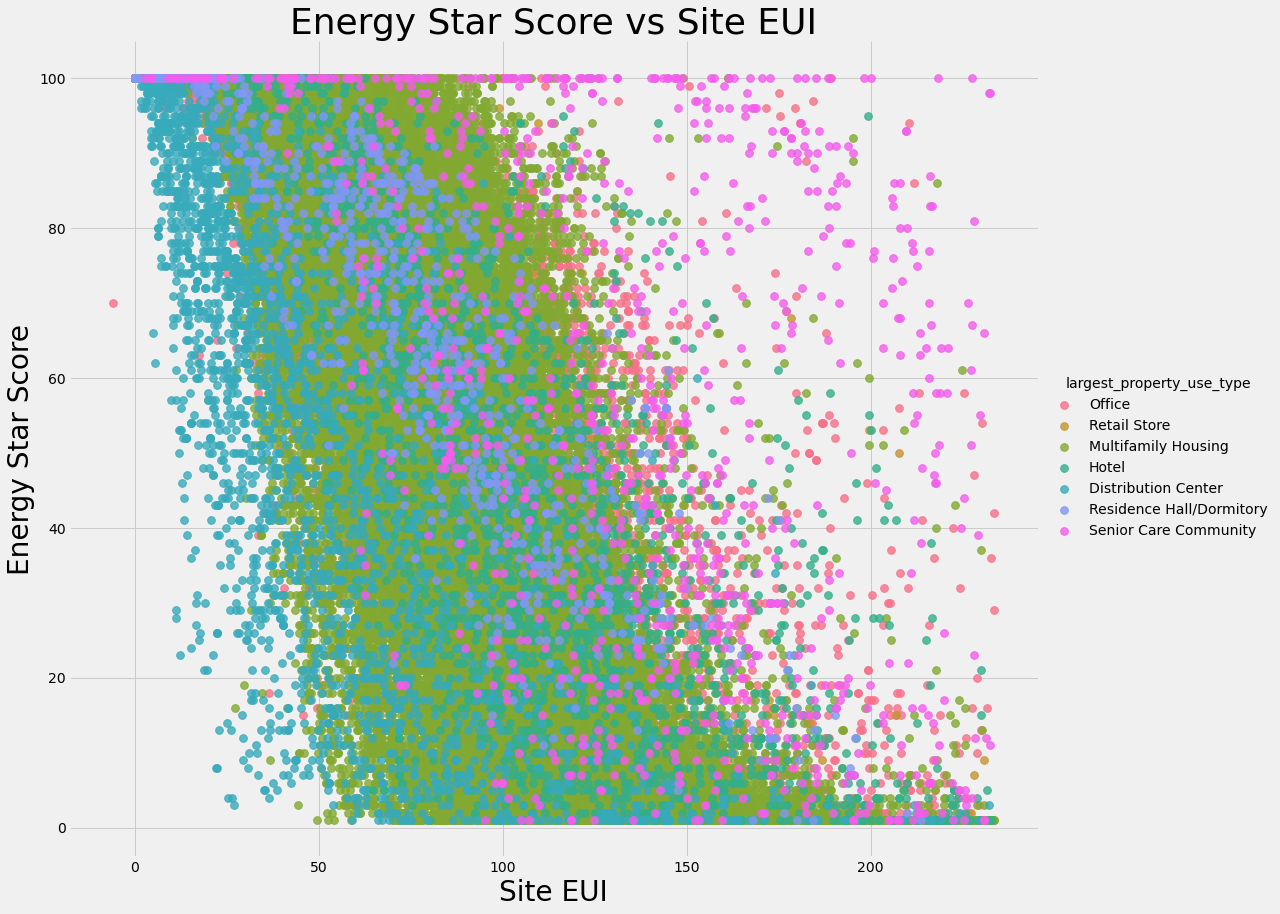

In [37]:
figsize(12, 10)

# Extract the building types
features['largest_property_use_type'] = data_1.dropna(subset = ['score'])['largest_property_use_type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['largest_property_use_type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('site_eui_kbtu_ft', 'score', 
          hue = 'largest_property_use_type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);


In [158]:
# Remove any columns with all na values
features_1  = features.dropna(axis=1, how = 'all')
features_1.shape

(127570, 106)

In [159]:
features_1.columns

Index(['property_id', 'year_built', 'number_of_buildings', 'occupancy',
       'score', 'site_eui_kbtu_ft', 'site_energy_use_kbtu',
       'source_eui_kbtu_ft', 'natural_gas_use_kbtu', 'green_power_offsite_kwh',
       ...
       'largest_property_use_type_Food Service',
       'largest_property_use_type_Hotel',
       'largest_property_use_type_Multifamily Housing',
       'largest_property_use_type_Office', 'largest_property_use_type_Other',
       'largest_property_use_type_Recreation',
       'largest_property_use_type_Residence Hall/Dormitory',
       'largest_property_use_type_Retail Store',
       'largest_property_use_type_Senior Care Community',
       'largest_property_use_type_nan'],
      dtype='object', length=106)

In [160]:
features_1.drop(['property_id','number_of_buildings','community_board', 'longitude','log_property_id','sqrt_property_id',
 'census_tract','national_median_site_eui','sqrt_number_of_buildings','log_number_of_buildings','sqrt_occupancy','log_occupancy',
'sqrt_community_board', 'log_community_board', 'sqrt_census_tract','log_census_tract', 'sqrt_national_median_site_eui',
       'log_national_median_site_eui'  ], axis=1, inplace=True)


/Users/Lucy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [139]:
# Extract the buildings with no score and the buildings with a score
no_score = features_1[features_1['score'].isna()]
score = features_1[features_1['score'].notnull()]

print(no_score.shape)
print(score.shape)

(0, 49)
(127570, 49)


In [141]:
# Separate out the features and targets
features = score.drop(columns=['score'])
targets = score['score']

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

In [142]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127570 entries, 0 to 175781
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   year_built                                          127570 non-null  int64  
 1   occupancy                                           127570 non-null  int64  
 2   site_eui_kbtu_ft                                    127570 non-null  float64
 3   site_energy_use_kbtu                                127570 non-null  float64
 4   green_power_offsite_kwh                             126339 non-null  float64
 5   weather_normalized_site                             101290 non-null  float64
 6   weather_normalized_site_1                           92956 non-null   float64
 7   total_ghg_emissions_metric                          105065 non-null  float64
 8   egrid_output_emissions_rate                         104991 non-n

In [143]:
# Delete columns containing either 75% or more than 75% NaN Values
perc = 30.0
min_count =  int(((100-perc)/100)*features.shape[0] + 1)
features = features.dropna( axis=1, thresh=min_count)

In [144]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127570 entries, 0 to 175781
Data columns (total 42 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   year_built                                          127570 non-null  int64  
 1   occupancy                                           127570 non-null  int64  
 2   site_eui_kbtu_ft                                    127570 non-null  float64
 3   site_energy_use_kbtu                                127570 non-null  float64
 4   green_power_offsite_kwh                             126339 non-null  float64
 5   weather_normalized_site                             101290 non-null  float64
 6   weather_normalized_site_1                           92956 non-null   float64
 7   total_ghg_emissions_metric                          105065 non-null  float64
 8   egrid_output_emissions_rate                         104991 non-n

In [131]:
# fill in nan with mean
for i in features.columns:
    mean_value=features[i].mean()
    features[i].fillna(value=mean_value, inplace=True)

In [132]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(81644, 42)
(20412, 42)
(25514, 42)
(81644,)
(20412,)
(25514,)


In [115]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127570 entries, 0 to 175781
Data columns (total 42 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   year_built                                          127570 non-null  int64  
 1   occupancy                                           127570 non-null  int64  
 2   site_eui_kbtu_ft                                    127570 non-null  float64
 3   site_energy_use_kbtu                                127570 non-null  float64
 4   green_power_offsite_kwh                             127570 non-null  float64
 5   weather_normalized_site                             127570 non-null  float64
 6   weather_normalized_site_1                           127570 non-null  float64
 7   total_ghg_emissions_metric                          127570 non-null  float64
 8   egrid_output_emissions_rate                         127570 non-n

In [116]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [117]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 60.00
Baseline Performance on the test set: MAE = 25.9070


In [133]:
# fit the regressor with val data
regressor = DecisionTreeRegressor() 
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
y_val_pred = regressor.predict(X_val)
#fit test on extracted features 

print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
#print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))

print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
#print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))


MSE train: 0.164, val: 353.978
R^2 train: 1.000, val: 0.614


In [ ]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)[:6]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(5, 7))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")


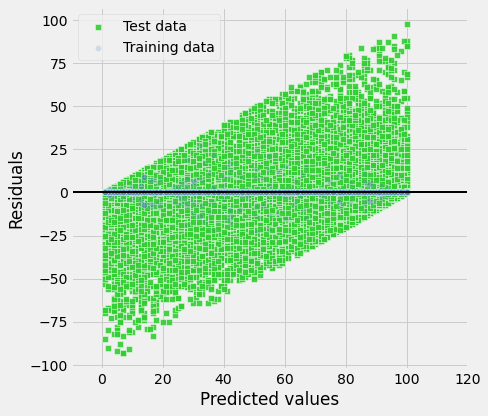

In [135]:
fig = plt.figure(figsize=(7, 6))

plt.scatter(y_val_pred,  
            y_val_pred - y_val, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.2,
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
plt.xlim([-10, 120])
plt.tight_layout()

#plt.savefig('GBR.png', dpi=300)
plt.show()    

In [136]:
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_train_pred=reg.predict(X_train)
y_val_pred=reg.predict(X_val)
#test
#y_test_pred=reg.predict(X_test)

print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
#print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))

print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))

MSE train: 215.851, val: 222.729
R^2 train: 0.763, val: 0.757


In [ ]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)[:6]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(5, 7))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")


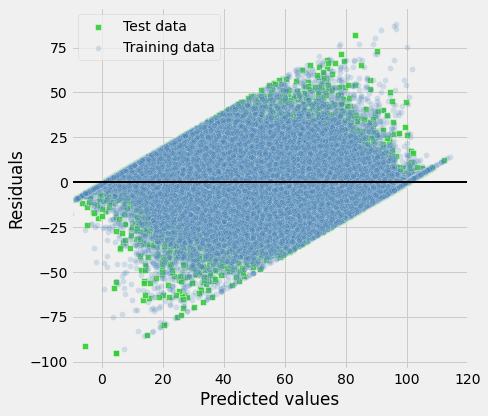

In [138]:
fig = plt.figure(figsize=(7, 6))

plt.scatter(y_val_pred,  
            y_val_pred - y_val, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.2,
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
plt.xlim([-10, 120])
plt.tight_layout()

#plt.savefig('GBR.png', dpi=300)
plt.show()    